# D208 Performance Assessment 
### Task 1 - E3
### Darian Gurrola
### Course Instructor: Dr. Keiona Middleton

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_churn = pd.read_csv('churn_clean.csv')

### Data Cleaning / Transformation

In [4]:
#Create function to provide boxplot information
def boxplot_info(input):

    #obtain values of column and ignore nulls 
    data = input.dropna().values
    
    #generate q1 and q3 using pandas.DataFrame.quantile.  
    q1 = input.quantile(0.25)
    print("Q1: " + str(q1))
    q3 = input.quantile(0.75)
    print("Q3: " + str(q3))
    
    #Calculate interquartile range for boxplot by subtracting Q1 from Q3
    iqr = q3 - q1
    print("IQR: " + str(iqr))
    
    #Calculate whisker values of boxplot. 
    whisker_lower = q1 - (1.5 * iqr)
    print("Lower Whisker: " + str(whisker_lower))
    whisker_upper = q3 + (1.5 * iqr)
    print("Upper Whisker: " + str(whisker_upper))
    
     #Find number of outliers outside of Q1 and Q3.  Print total number of outliers in column.  
    outliers_min = (input < whisker_lower).sum()
    print("Number of outliers lower than boxplot minimum: " + str(outliers_min))
    outliers_max = (input > whisker_upper).sum()
    print("Number of outliers greater than boxplot maximum: " + str(outliers_max))
    outliers_total = outliers_min + outliers_max
    print("Total number of Outliers: " + str(outliers_total))
    max_outlier = max(data)
    print("Highest Outlier: " + str(max_outlier))
    min_outlier = min(data)
    print("Lowest Outlier: " + str(min_outlier))

In [6]:
#Treat missing values in InternetService with mode imputation
df_churn['InternetService'] = df_churn['InternetService'].fillna(df_churn['InternetService'].mode()[0])

In [7]:
#Re-express Area as numeric using one-hot encoding

#Use pd.get_dummies to turn Area variable into 3 dummy variables
df_area = pd.get_dummies(df_churn["Area"], prefix="dummy")

#Change data type of dummy variables from boolean to float
df_area = df_area.astype(float)

#Join dummy_Suburban and dummy_Urban to df_churn.  Use dummy_Rural as base.
df_churn = df_churn.join(df_area[["dummy_Suburban","dummy_Urban"]])

In [8]:
#Re-express Contract as numeric using one-hot encoding

#Use pd.get_dummies to turn Area variable into 3 dummy variables
df_contract = pd.get_dummies(df_churn["Contract"], prefix="dummy")

#Change data type of dummy variables from boolean to float
df_contract = df_contract.astype(float)

#Join dummy_One year and dummy_Two Year to df_churn.  Use dummy_Month-to-month as base.
df_churn = df_churn.join(df_contract[["dummy_One year","dummy_Two Year"]])

In [9]:
#Re-express Port_modem as numeric 

#Find unique values of  variable
print(df_churn["Port_modem"].unique())

#Create dictionary to store numeric values for variable
dict_modem = {"Port_modem":
                    {"Yes":1,
                     "No": 0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_modem, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["Port_modem"] = df_churn["Port_modem"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["Port_modem"].unique())

['Yes' 'No']
[1. 0.]


In [10]:
#Re-express OnlineBackup as numeric 

#Find unique values of  variable
print(df_churn["OnlineBackup"].unique())

#Create dictionary to store numeric values for variable
dict_backup = {"OnlineBackup":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_backup, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["OnlineBackup"] = df_churn["OnlineBackup"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["OnlineBackup"].unique())

['Yes' 'No']
[1. 0.]


In [11]:
#Re-express StreamingTV as numeric 

#Find unique values of  variable
print(df_churn["StreamingTV"].unique())

#Create dictionary to store numeric values for variable
dict_streamingtv = {"StreamingTV":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_streamingtv, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["StreamingTV"] = df_churn["StreamingTV"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["StreamingTV"].unique())

['No' 'Yes']
[0. 1.]


In [12]:
#Re-express StreamingMovies as numeric 

#Find unique values of  variable
print(df_churn["StreamingMovies"].unique())

#Create dictionary to store numeric values for variable
dict_movies = {"StreamingMovies":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_movies, inplace=True)

#Change variable to float for compatability with linear regression
df_churn["StreamingMovies"] = df_churn["StreamingMovies"].astype(float)

#Confirm categorical values have been replaced
print(df_churn["StreamingMovies"].unique())

['Yes' 'No']
[1. 0.]


### Initial Model

In [14]:
#Build initial linear regression model [In-text citation: (LaRose et al, 2019)]

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure","MonthlyCharge"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_initial = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_initial.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.983e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67771.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9984   BIC:                         1.357e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                342.1945     15

### Model Reduction 

In [16]:
#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure","MonthlyCharge"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

               feature        VIF
0           Population   1.446931
1       dummy_Suburban   1.950691
2          dummy_Urban   1.946850
3             Children   1.905455
4                  Age   6.660254
5               Income   2.874223
6       dummy_One year   1.375000
7       dummy_Two Year   1.439851
8           Port_modem   1.903563
9   Outage_sec_perweek   9.759777
10        OnlineBackup   2.152764
11         StreamingTV   3.085446
12     StreamingMovies   3.584116
13              Tenure   2.620867
14       MonthlyCharge  30.663539


In [17]:
#Remove MonthlyCharge (VIF = 30.663539)
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

               feature       VIF
0           Population  1.438758
1       dummy_Suburban  1.911255
2          dummy_Urban  1.901632
3             Children  1.882061
4                  Age  5.933914
5               Income  2.781405
6       dummy_One year  1.362977
7       dummy_Two Year  1.427496
8           Port_modem  1.880992
9   Outage_sec_perweek  7.768865
10        OnlineBackup  1.775575
11         StreamingTV  1.912008
12     StreamingMovies  1.905778
13              Tenure  2.571060


In [18]:
#Iterate on initial model, remove MonthlyCharge and check p-values

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Port_modem","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.451e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9985   BIC:                         1.357e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                406.6627     11

In [19]:
#Continue iterating on model, remove Port_modem and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","Outage_sec_perweek","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.025e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9986   BIC:                         1.357e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                405.9764     11

In [20]:
#Continue iterating on model, remove Outage_sec_perweek and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Population","dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 8.694e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9987   BIC:                         1.357e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             402.9893      9.086     

In [21]:
#Continue iterating on model, remove Population and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["dummy_Suburban","dummy_Urban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.486e+04
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9988   BIC:                         1.357e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             403.7859      8.973     

In [22]:
#Continue iterating on model, remove dummy_Urban and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["dummy_Suburban","Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9989   BIC:                         1.357e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             405.3515      8.589     

In [23]:
#Continue iterating on model, remove dummy_Suburban and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","dummy_One year","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.160e+05
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67792.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9990   BIC:                         1.357e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             406.0201      8.456     

In [24]:
#Continue iterating on model, remove dummy_One year and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","dummy_Two Year","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.304e+05
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67793.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9991   BIC:                         1.357e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             407.3065      8.324     

In [25]:
#Continue iterating on model, remove dummy_Two Year and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","Income","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.491e+05
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67793.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9992   BIC:                         1.357e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             408.3024      8.239     

In [26]:
#Continue iterating on model, remove Income and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.739e+05
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:14   Log-Likelihood:                -67794.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9993   BIC:                         1.357e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             413.1511      7.665     

### Reduced Model

In [28]:
#Continue iterating on model, remove Income and check p-values again

#Assign independent variables to dataframe X
X = pd.DataFrame(df_churn[["Children","Age","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_churn[["Bandwidth_GB_Year"]])

#Run multiple linear regression model
mdl_reduced = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.739e+05
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:38:15   Log-Likelihood:                -67794.
No. Observations:               10000   AIC:                         1.356e+05
Df Residuals:                    9993   BIC:                         1.357e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             413.1511      7.665     

### Residual Plot

In [30]:
#Assign independent variables to ind_variables
X = pd.DataFrame(df_churn[["Children","Age","OnlineBackup","StreamingTV","StreamingMovies","Tenure"]])

#Add constant
X = sm.add_constant(X)

#Generate predictions using sklearn.predict().  [In-text citation: (Ebner, 2022)]
Predicted_Bandwidth_GB_Year = mdl_reduced.predict(X)

#Calculate residuals
residuals = df_churn["Bandwidth_GB_Year"] - Predicted_Bandwidth_GB_Year
print(residuals)

0      -149.843210
1       -92.843021
2       179.721248
3       248.075866
4      -235.684753
           ...    
9995    398.540805
9996     -8.961244
9997   -106.982030
9998   -117.840687
9999      5.729408
Length: 10000, dtype: float64


Text(0, 0.5, 'Residuals')

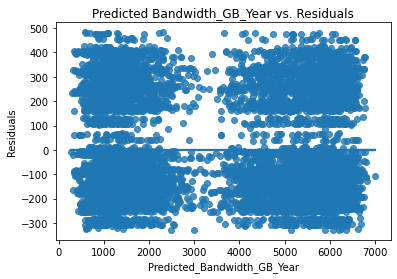

In [31]:
sns.regplot(y=residuals, x=Predicted_Bandwidth_GB_Year)
plt.title("Predicted Bandwidth_GB_Year vs. Residuals")
plt.xlabel("Predicted_Bandwidth_GB_Year")
plt.ylabel("Residuals")

### Residual Standard Error

In [61]:
#Calculate mean squared error of initial model
mse_reduced = mdl_reduced.mse_resid

#Calculate residual standard error using mse
rse_reduced = np.sqrt(mse_reduced)
print("Reduced Model Residual Standard Error: " + str(rse_reduced))

Reduced Model Residual Standard Error: 212.90385030731335
